In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
passengerid = df_test.PassengerId
combine = [df_train, df_test]

In [3]:
df_train.sample(5)

PassengerId  Survived  Pclass                          Name     Sex  \
263          264         0       1         Harrison, Mr. William    male   
866          867         1       2  Duran y More, Miss. Asuncion  female   
521          522         0       3               Vovk, Mr. Janko    male   
455          456         1       3            Jalsevac, Mr. Ivan    male   
356          357         1       1   Bowerman, Miss. Elsie Edith  female   

      Age  SibSp  Parch         Ticket     Fare Cabin Embarked  
263  40.0      0      0         112059   0.0000   B94        S  
866  27.0      1      0  SC/PARIS 2149  13.8583   NaN        C  
521  22.0      0      0         349252   7.8958   NaN        S  
455  29.0      0      0         349240   7.8958   NaN        C  
356  22.0      0      1         113505  55.0000   E33        S

In [4]:
df_test.sample(5)

PassengerId  Pclass                                    Name     Sex  \
10           902       3                        Ilieff, Mr. Ylio    male   
280         1172       3                  Oreskovic, Miss. Jelka  female   
22           914       1    Flegenheim, Mrs. Alfred (Antoinette)  female   
187         1079       3                      Davies, Mr. Joseph    male   
291         1183       3  Daly, Miss. Margaret Marcella Maggie""  female   

      Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
10    NaN      0      0     349220   7.8958   NaN        S  
280  23.0      0      0     315085   8.6625   NaN        S  
22    NaN      0      0   PC 17598  31.6833   NaN        S  
187  17.0      2      0  A/4 48873   8.0500   NaN        S  
291  30.0      0      0     382650   6.9500   NaN        Q

In [5]:
print("The shape of the train data is (row, column):" + str(df_train.shape))
print(df_train.info())
print("The shape of the train data is (row, column):" + str(df_test.shape))
print(df_test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
The shape of the train data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 no

In [6]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [7]:
missing_percentage(df_train)[missing_percentage(df_train)["Total"] != 0]

Total  Percent
Cabin       687    77.10
Age         177    19.87
Embarked      2     0.22

In [8]:
missing_percentage(df_test)[missing_percentage(df_test)["Total"] != 0]

Total  Percent
Cabin    327    78.23
Age       86    20.57
Fare       1     0.24

In [9]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [10]:
percent_value_counts(df_train, 'Embarked')

Total  Percent
S      644    72.28
C      168    18.86
Q       77     8.64
NaN      2     0.22

In [11]:
df_train[df_train.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

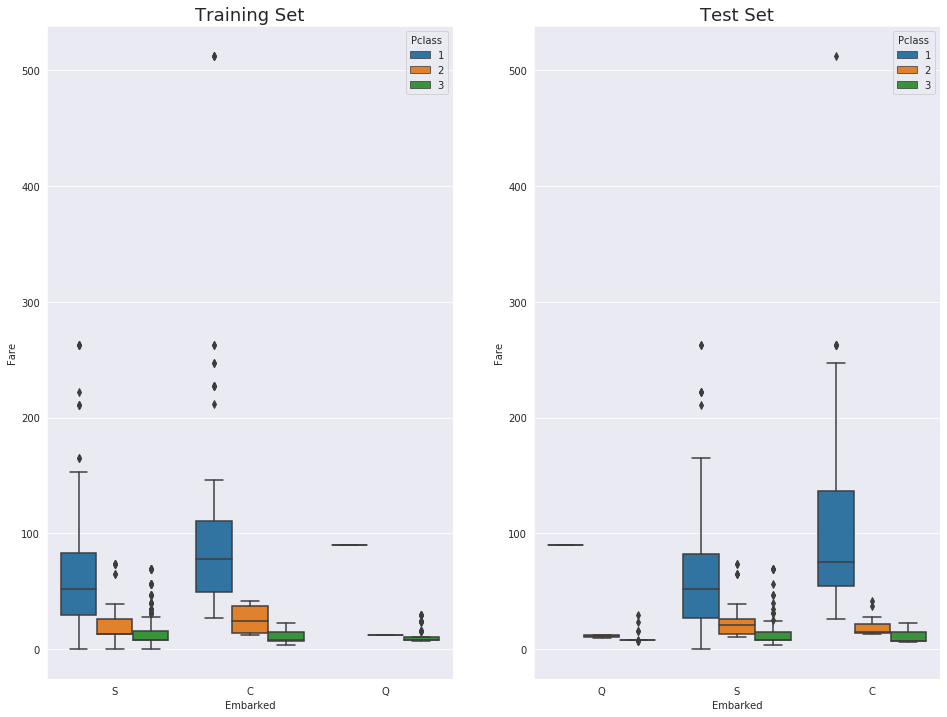

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

fig.show()

In [13]:
# replace the null values with C; the avarage fare closest to $80 are in the C embarked values
df_train.Embarked.fillna("C", inplace=True)

In [14]:
print("Train Cabin missing: " + str(df_train.Cabin.isnull().sum()/len(df_train.Cabin)))
print("Test Cabin missing: " + str(df_test.Cabin.isnull().sum()/len(df_test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [15]:
surviveres = df_train.Survived
df_train.drop(["Survived"], axis=1, inplace=True)
all_data = pd.concat([df_train, df_test], ignore_index=False)

# Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [16]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [17]:
percent_value_counts(all_data, "Cabin")

Total  Percent
N   1014    77.46
C     94     7.18
B     65     4.97
D     46     3.51
E     41     3.13
A     22     1.68
F     21     1.60
G      5     0.38
T      1     0.08

In [18]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [19]:
with_N = all_data[all_data.Cabin == "N"]
without_N = all_data[all_data.Cabin != "N"]
with_N.__len__(), without_N.__len__()

(1014, 295)

In [20]:
def cabin_estimator(i):
    """
    Grouping cabin feature by the first letter
    """
    a = 0
    if i < 15:
        a = "G"
    elif i >= 15 and i < 27: # (18 + 35) / 2
        a = "F"
    elif i >= 27 and i < 39: # (35 + 41) / 2
        a = "T"
    elif i >= 39 and i < 47: # (41 + 53) / 2
        a = "A"
    elif i >= 47 and i < 53:
        a = "D"
    elif i >= 53 and i < 54: 
        a = "E"
    elif i >= 54 and i < 115: # (108 + 122) / 2
        a = "C"
    else:
        a = "B"
    return a

In [21]:
# applying cabin estimator function
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

# getting back train
all_data = pd.concat([with_N, without_N], axis=0)

# PassengerId helps to separate train and test
all_data.sort_values(by = 'PassengerId', inplace=True)

# Separating train and test from all_data
df_train = all_data[:891]
df_test = all_data[891:]

# adding saved target variable with train
df_train['Survived'] = surviveres

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [22]:
missing_percentage(df_train)[missing_percentage(df_train)["Total"] != 0]

Total  Percent
Age    177    19.87

In [23]:
missing_percentage(df_test)[missing_percentage(df_test)["Total"] != 0]

Total  Percent
Age      86    20.57
Fare      1     0.24

In [24]:
df_test[df_test.Fare.isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN     B        S

In [25]:
missing_value = df_test[(df_test.Pclass == 3) & (df_test.Embarked == "S") & (df_test.Sex == "male")].Fare.mean()
# replace the df_test.fare null values with df_test.fare mean
df_test.Fare.fillna(missing_value, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
missing_percentage(df_test)[missing_percentage(df_test)["Total"] != 0]

Total  Percent
Age     86    20.57

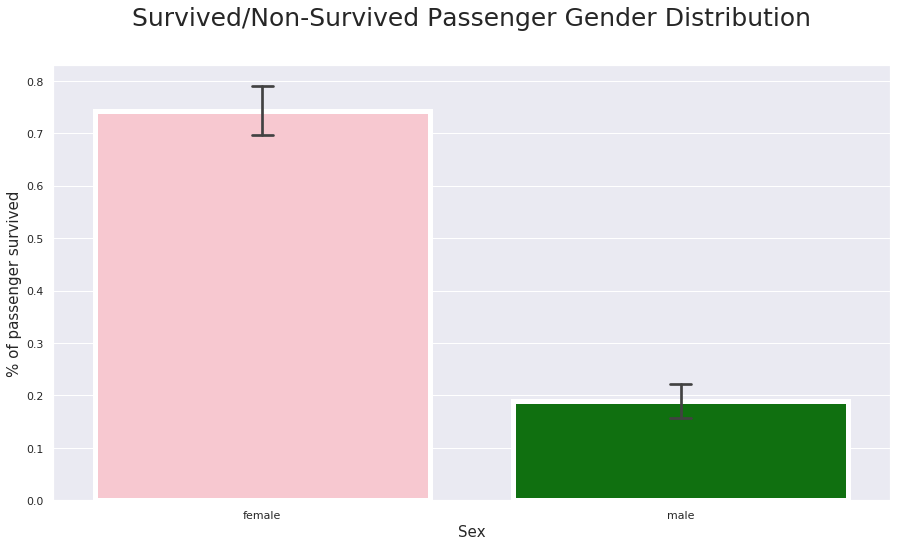

In [27]:
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df_train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

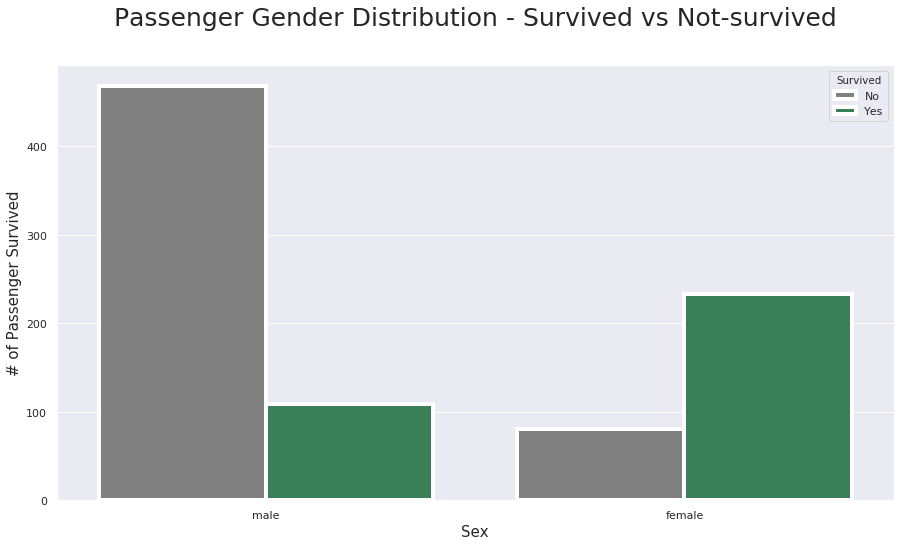

In [28]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df_train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

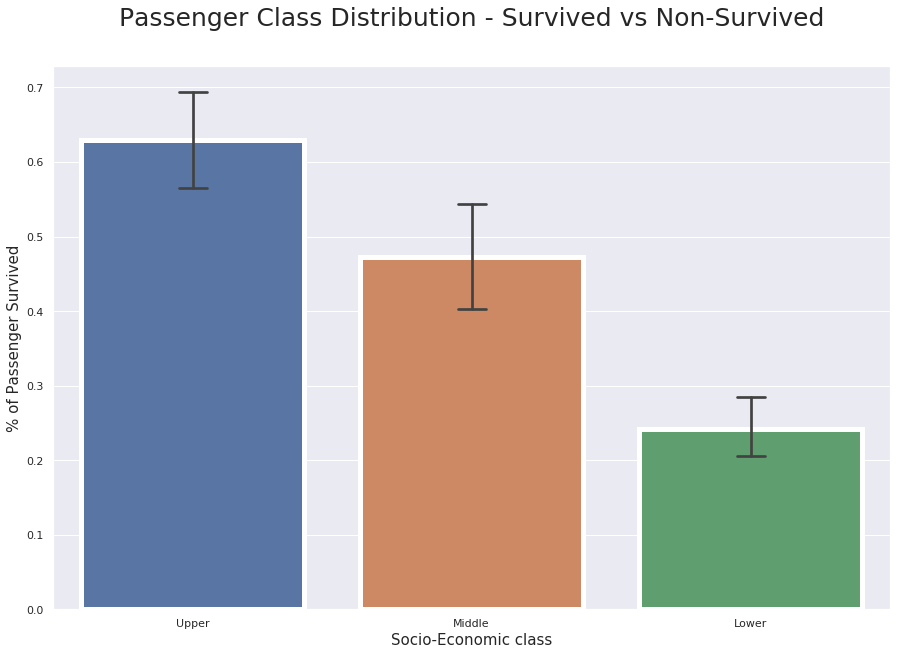

In [29]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=df_train, 
            linewidth=5,
            capsize = .1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

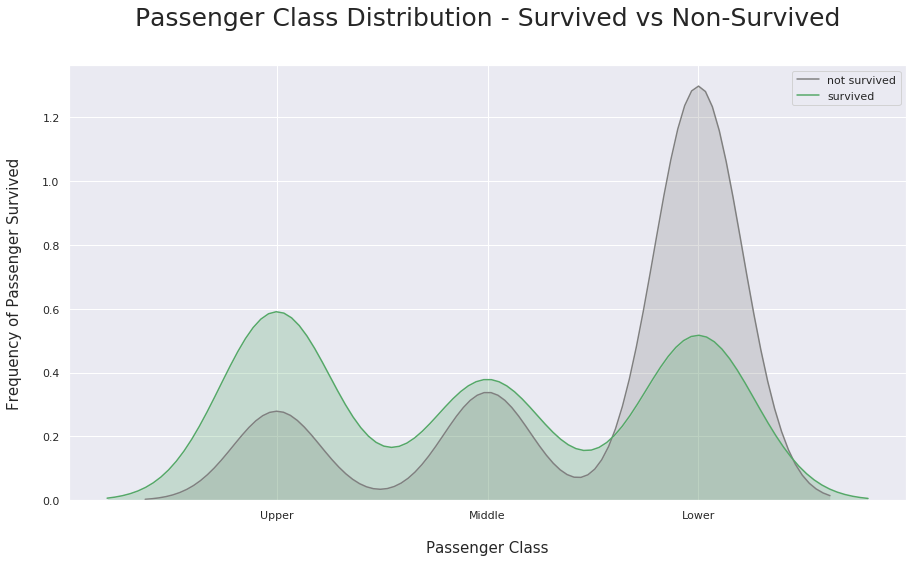

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);


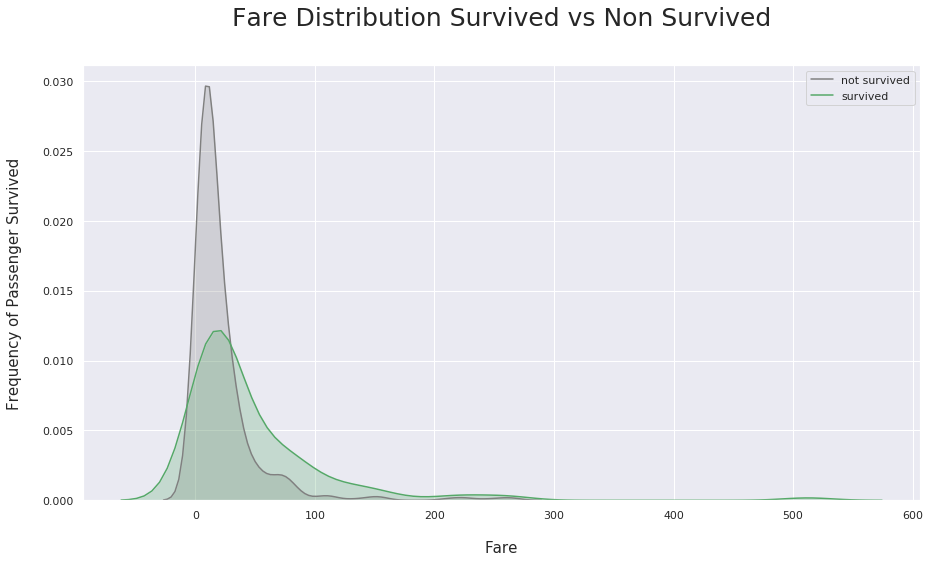

In [31]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

In [32]:
df_train[df_train.Fare > 280]

PassengerId  Pclass                                Name     Sex   Age  \
258          259       1                    Ward, Miss. Anna  female  35.0   
679          680       1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737          738       1              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked  Survived  
258      0      0  PC 17755  512.3292     B        C         1  
679      0      1  PC 17755  512.3292     B        C         1  
737      0      0  PC 17755  512.3292     B        C         1

In [33]:
df_train[(df_train.Fare < 100) & df_train.Survived == 1].__len__(), df_train[(df_train.Fare < 100) & df_train.Survived == 0].__len__() 

(303, 588)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


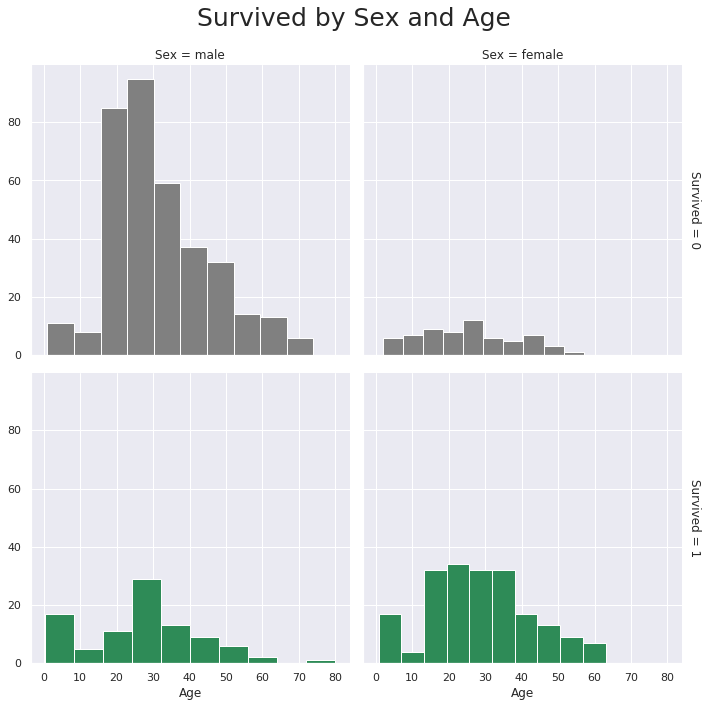

In [34]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df_train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


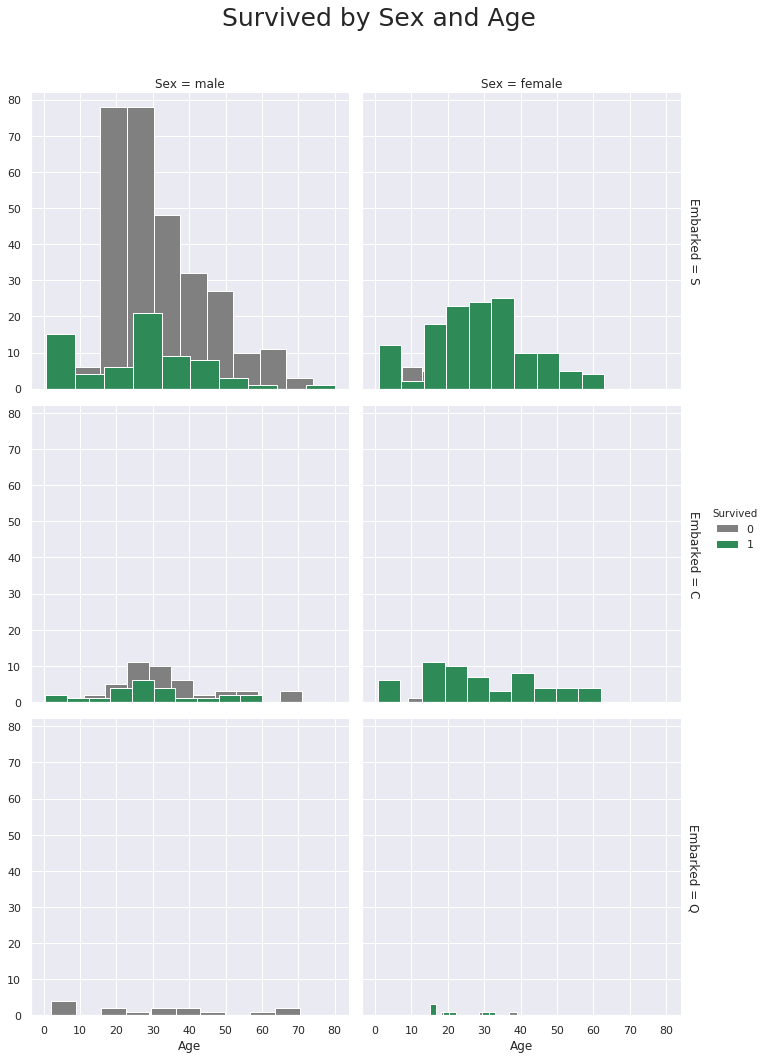

In [35]:
g = sns.FacetGrid(df_train,size=5, 
                  col="Sex",
                  row="Embarked", 
                  margin_titles=True, 
                  hue = "Survived",
                  palette = pal)

g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


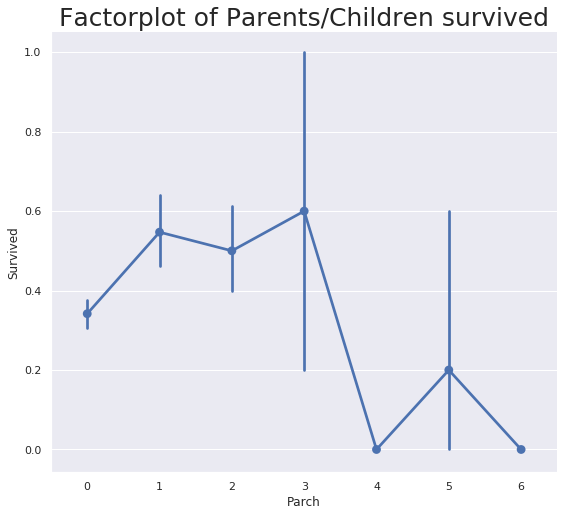

In [36]:
## dropping the three outliers where Fare is over $500 
df_train = df_train[df_train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = df_train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


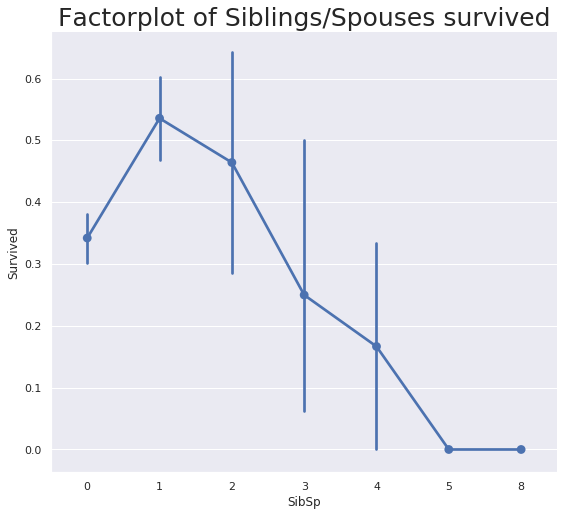

In [37]:
## dropping the three outliers where Fare is over $500 
df_train = df_train[df_train.Fare < 500]
## factor plot
sns.factorplot(x = "SibSp", y = "Survived", data = df_train,kind = "point",size = 8)
plt.title("Factorplot of Siblings/Spouses survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

In [38]:
df_train['Sex'] = df_train.Sex.apply(lambda x: 0 if x == "female" else 1)
df_test['Sex'] = df_test.Sex.apply(lambda x: 0 if x == "female" else 1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df_train.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   888.000000  888.000000  888.000000  711.000000  888.000000   
mean    445.618243    2.313063    0.647523   29.675345    0.524775   
std     257.405474    0.834007    0.478011   14.552495    1.104186   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     222.750000    2.000000    0.000000   20.000000    0.000000   
50%     445.500000    3.000000    1.000000   28.000000    0.000000   
75%     667.250000    3.000000    1.000000   38.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Survived  
count  888.000000  888.000000  888.000000  
mean     0.381757   30.582164    0.381757  
std      0.806949   41.176366    0.486091  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   30.771850    1.000000  
max      6.000000  263.000000    1.000000

In [40]:
df_train.describe(include=['O'])

Name  Ticket Cabin Embarked
count                               888     888   888      888
unique                              888     680     8        3
top     Homer, Mr. Harry ("Mr E Haven")  347082     G        S
freq                                  1       7   437      644

In [41]:
df_train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

Pclass  Survived
0       1  0.624413
1       2  0.472826
2       3  0.242363

In [42]:
survived_summary = df_train.groupby("Survived")
survived_summary.mean().reset_index()

Survived  PassengerId    Pclass       Sex        Age     SibSp     Parch  \
0         0   447.016393  2.531876  0.852459  30.626179  0.553734  0.329690   
1         1   443.353982  1.958702  0.315634  28.270627  0.477876  0.466077   

        Fare  
0  22.117887  
1  44.289799

In [43]:
survived_summary = df_train.groupby("Sex")
survived_summary.mean().reset_index()

Sex  PassengerId    Pclass        Age     SibSp     Parch       Fare  \
0    0   431.578275  2.162939  27.888462  0.696486  0.651757  42.985091   
1    1   453.260870  2.394783  30.705477  0.431304  0.234783  23.830658   

   Survived  
0  0.741214  
1  0.186087

In [44]:
survived_summary = df_train.groupby("Pclass")
survived_summary.mean().reset_index()

Pclass  PassengerId       Sex        Age     SibSp     Parch       Fare  \
0       1   460.225352  0.563380  38.280984  0.422535  0.356808  78.124061   
1       2   445.956522  0.586957  29.877630  0.402174  0.380435  20.662183   
2       3   439.154786  0.706721  25.140620  0.615071  0.393075  13.675550   

   Survived  
0  0.624413  
1  0.472826  
2  0.242363

In [45]:
pd.DataFrame(abs(df_train.corr()['Survived']).sort_values(ascending=False))

Survived
Survived     1.000000
Sex          0.545899
Pclass       0.334068
Fare         0.261742
Parch        0.082157
Age          0.079472
SibSp        0.033395
PassengerId  0.006916

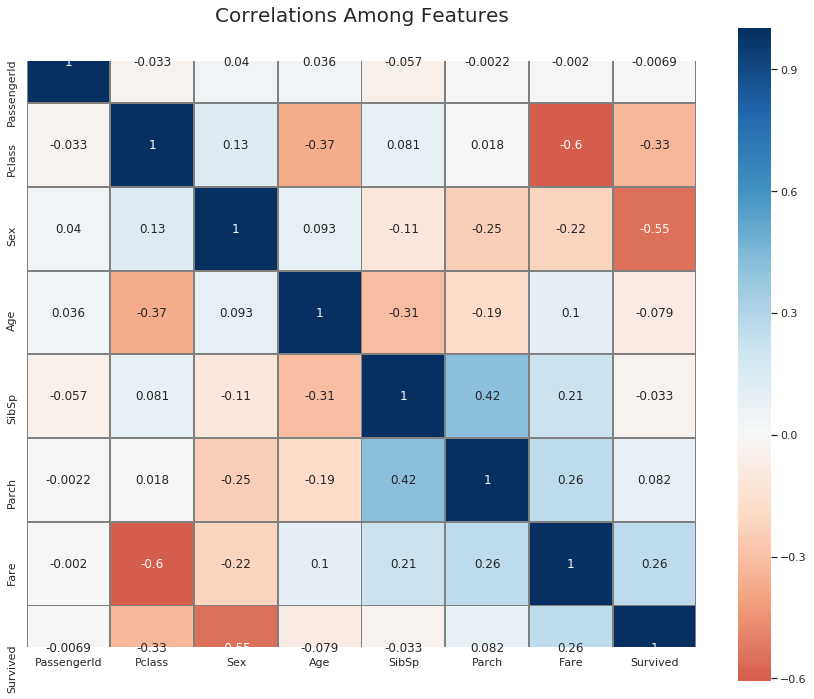

In [46]:
plt.subplots(figsize = (15, 12))
sns.heatmap(df_train.corr(), 
            annot=True, 
            mask=np.zeros_like(df_train.corr(), dtype=np.bool),
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True
           
           );
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [47]:
male_mean = df_train[df_train['Sex'] == 1].Survived.mean()
female_mean = df_train[df_train['Sex'] == 0].Survived.mean()
print("Male survival mean: " + str(male_mean))
print("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


In [48]:
import random
male = df_train[df_train['Sex'] == 1]
female = df_train[df_train['Sex'] == 0]

m_mean_samples = []
f_mean_samples = []
for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50,)))
    
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 0.19
Male mean sample mean: 0.75
Difference between male and female mean sample mean: 0.56


In [49]:
import scipy.stats as stats
print (stats.ttest_ind(m_mean_samples, f_mean_samples))
print ("This is the p-value when we break it into standard form: \n" + format(stats.ttest_ind(m_mean_samples, f_mean_samples).pvalue, '.32f'))

Ttest_indResult(statistic=-50.165719154003376, pvalue=1.0729288104499405e-71)
This is the p-value when we break it into standard form: 
0.00000000000000000000000000000000


In [50]:
# Creating a new colomn with a 
df_train['name_length'] = [len(i) for i in df_train.Name]
df_test['name_length'] = [len(i) for i in df_test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


df_train['nLength_group'] = df_train['name_length'].map(name_length_group)
df_test['nLength_group'] = df_test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
## get the title from the name
df_train["title"] = [i.split('.')[0] for i in df_train.Name]
df_train["title"] = [i.split(',')[1] for i in df_train.title]
df_test["title"] = [i.split('.')[0] for i in df_test.Name]
df_test["title"]= [i.split(',')[1] for i in df_test.title]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
df_train["title"] = [i.replace('Ms', 'Miss') for i in df_train.title]
df_train["title"] = [i.replace('Mlle', 'Miss') for i in df_train.title]
df_train["title"] = [i.replace('Mme', 'Mrs') for i in df_train.title]
df_train["title"] = [i.replace('Dr', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Col', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Major', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Don', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Jonkheer', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Sir', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Lady', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Capt', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('the Countess', 'rare') for i in df_train.title]
df_train["title"] = [i.replace('Rev', 'rare') for i in df_train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
df_test['title'] = [i.replace('Ms', 'Miss') for i in df_test.title]
df_test['title'] = [i.replace('Dr', 'rare') for i in df_test.title]
df_test['title'] = [i.replace('Col', 'rare') for i in df_test.title]
df_test['title'] = [i.replace('Dona', 'rare') for i in df_test.title]
df_test['title'] = [i.replace('Rev', 'rare') for i in df_test.title]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [53]:
## Family_size seems like a good feature to create
df_train['family_size'] = df_train.SibSp + df_train.Parch+1
df_test['family_size'] = df_test.SibSp + df_test.Parch+1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [55]:
df_train['family_group'] = df_train['family_size'].map(family_group)
df_test['family_group'] = df_test['family_size'].map(family_group)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df_train['is_alone'] = [1 if i<2 else 0 for i in df_train.family_size]
df_test['is_alone'] = [1 if i<2 else 0 for i in df_test.family_size]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df_train.drop(['Ticket'], axis=1, inplace=True)
df_test.drop(['Ticket'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
df_train['calculated_fare'] = df_train.Fare / df_train.family_size
df_test['calculated_fare'] = df_test.Fare / df_test.family_size

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

df_train['fare_group'] = df_train['calculated_fare'].map(fare_group)
df_test['fare_group'] = df_test['calculated_fare'].map(fare_group)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [60]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
df_test.drop(['PassengerId'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df_train = pd.get_dummies(df_train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
df_test = pd.get_dummies(df_test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
df_train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
df_test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [62]:
df_train.shape, df_test.shape

((888, 38), (418, 37))

In [63]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
df_train = pd.concat([df_train[["Survived", "Age", "Sex","SibSp","Parch"]], df_train.loc[:,"is_alone":]], axis=1)
df_test = pd.concat([df_test[["Age", "Sex"]], df_test.loc[:,"SibSp":]], axis=1)

In [64]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(df_train)
completing_age(df_test);

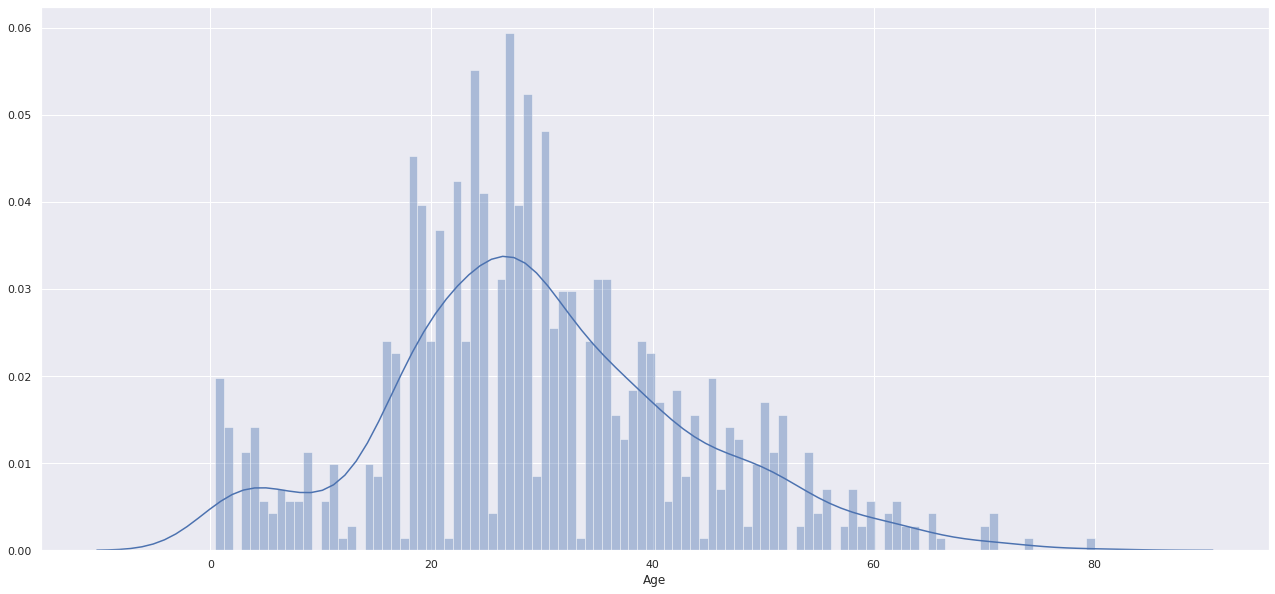

In [65]:
plt.subplots(figsize = (22,10),)
sns.distplot(df_train.Age, bins=100, kde=True, rug=False, norm_hist=False);

In [66]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
df_train['age_group'] = df_train['Age'].map(age_group_fun)
df_test['age_group'] = df_test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
df_train = pd.get_dummies(df_train,columns=['age_group'], drop_first=True)
df_test = pd.get_dummies(df_test,columns=['age_group'], drop_first=True);

df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [67]:
df_train.columns

Index(['Survived', 'Sex', 'SibSp', 'Parch', 'is_alone', 'calculated_fare',
       'title_ Master', 'title_ Miss', 'title_ Mr', 'title_ Mrs',
       'title_ rare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'nLength_group_good',
       'nLength_group_long', 'nLength_group_medium', 'nLength_group_short',
       'family_group_large', 'family_group_loner', 'family_group_small',
       'fare_group_Very_low', 'fare_group_high', 'fare_group_low',
       'fare_group_mid', 'fare_group_very_high', 'age_group_adult',
       'age_group_child', 'age_group_infant', 'age_group_middle_aged',
       'age_group_old', 'age_group_senior_citizen', 'age_group_teenager',
       'age_group_toddler'],
      dtype='object')

In [68]:
# separating our independent and dependent variable
X = df_train.drop(['Survived'], axis = 1)
y = df_train["Survived"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [70]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)

## transforming "The testset"
df_test = sc.transform(df_test)

In [71]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.8095


Confusion matrix, without normalization
[[151  26]
 [ 30  87]]
Normalized confusion matrix
[[0.85 0.15]
 [0.26 0.74]]


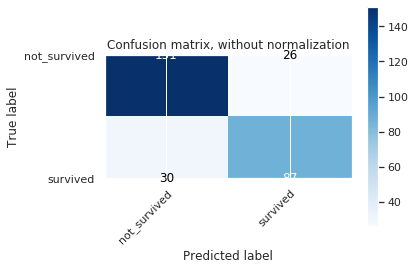

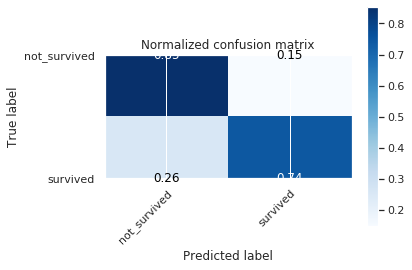

In [72]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       177
           1       0.77      0.74      0.76       117

    accuracy                           0.81       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.81      0.81      0.81       294



0.8292046936114733


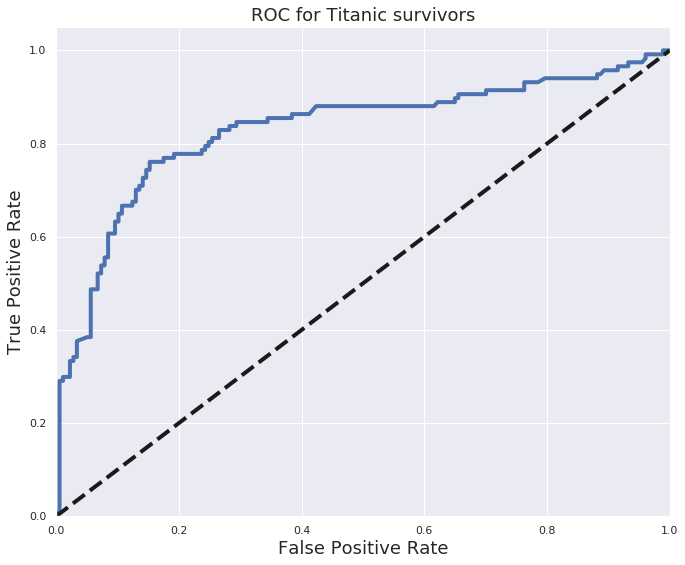

In [74]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

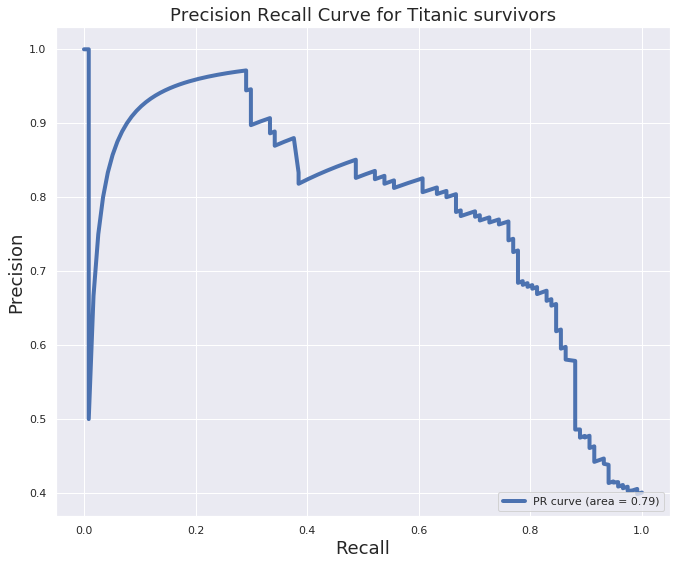

In [75]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [76]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82 0.84 0.82 0.85 0.84 0.82 0.82 0.85 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82883


In [77]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

/home/jupyter/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'pen

In [78]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8184684684684684
{'C': 6, 'penalty': 'l1'}
LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [79]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8434684684684685

In [80]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.82 0.81 0.82 0.8  0.82 0.81 0.79 0.79 0.79 0.82]
Mean Cross-Validation accuracy score: 0.806


In [81]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.759009009009009, 0.7747747747747747, 0.7936936936936936, 0.7945945945945946, 0.8058558558558557, 0.7972972972972974, 0.7972972972972974, 0.7972972972972973, 0.8040540540540541, 0.8027027027027028, 0.8040540540540541, 0.8054054054054054, 0.8072072072072073, 0.7977477477477477, 0.8031531531531533, 0.7914414414414415, 0.7968468468468469, 0.7846846846846847, 0.790990990990991, 0.7761261261261262, 0.7833333333333332, 0.772972972972973, 0.7792792792792793, 0.7720720720720722, 0.7702702702702702, 0.7639639639639639, 0.7666666666666666, 0.7621621621621621, 0.763063063063063, 0.7581081081081081]

Mean accuracy score: 0.785870870870871


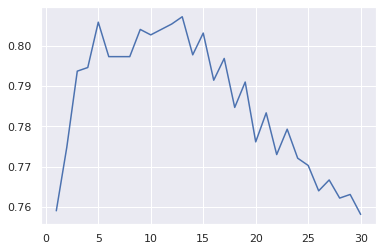

In [82]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores);

In [83]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [84]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8161048689138577
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [85]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8569819819819819

In [86]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=False)

In [87]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8119850187265918
{'weights': 'uniform', 'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [88]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.8569819819819819

In [89]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


In [90]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8460674157303371
{'C': 1, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [92]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8457207207207207

In [93]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

/home/jupyter/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
        

In [94]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 24}
0.8355855855855856
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [95]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.865990990990991

In [98]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

importance
title_ Mr                   0.529736
Pclass_3                    0.131335
calculated_fare             0.098502
title_ rare                 0.061080
family_group_large          0.058763
Embarked_S                  0.030268
Sex                         0.014361
title_ Master               0.012074
age_group_senior_citizen    0.011297
is_alone                    0.006904

In [99]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              ran

In [100]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8404494382022472
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 155}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=155,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [101]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8536036036036037

In [102]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       177
           1       0.74      0.72      0.73       117

    accuracy                           0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



In [103]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

importance
title_ Mr             0.183620
Sex                   0.158135
calculated_fare       0.094751
title_ Miss           0.064389
title_ Mrs            0.052709
Pclass_3              0.052194
Pclass_1              0.026241
Cabin_G               0.024921
fare_group_low        0.024511
family_group_large    0.023996

In [104]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8134831460674158
{'n_estimators': 70}
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=70,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [106]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9628378378378378

In [107]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8265917602996254
{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


In [109]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

0.8344594594594594

In [110]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.874


In [111]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.84


In [112]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.898


/home/jupyter/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [113]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.908


In [114]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
    ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='hard')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

/home/jupyter/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.861


In [116]:
all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b
    


In [117]:
test_prediction = (max(c, key=c.get)).predict(df_test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

In [120]:
!kaggle competitions submit -c titanic -f titanic1_submission.csv -m "Titanic"

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 733B/s]
Successfully submitted to Titanic: Machine Learning from Disaster